# Cryptocurrencies - Clustering & Visualization
By Trang VO
https://github.com/trang-h-vo

Load data & libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# for float data, display 3 decimals only
pd.options.display.float_format = "{:.3f}".format

In [3]:
folder_path = str(os.getcwd()) + '/'
cryptos = pd.read_csv(folder_path + 'crypto-markets.csv')
cryptos.head(3)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.300,135.980,132.100,134.210,0.000,1488566728.000,0.544,3.880
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.440,147.490,134.000,144.540,0.000,1603768865.000,0.781,13.490
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.000,146.930,134.050,139.000,0.000,1542813125.000,0.384,12.880


In [4]:
print(f'Number of observations: {cryptos.shape[0]}')
print(f'Number of features: {cryptos.shape[1]}')
print(f'Number of crypto tokens: {cryptos.name.unique().shape[0]}') 
print(f'Start date: {cryptos.date.min()} \nEnd date: {cryptos.date.max()}')

Number of observations: 942297
Number of features: 13
Number of crypto tokens: 2071
Start date: 2013-04-28 
End date: 2018-11-30


## Clustering

### Data prepration

**Filter out data of the 2 latest years in the dataset, and keep only top rank coins & with no missing values**

In [5]:
top_coins = cryptos.loc[(cryptos['date'] >= '2016-12-31') & (cryptos['ranknow'] <= 100)]
top_coins_close = top_coins.groupby(['date', 'name'])['close'].last().unstack()
top_coins_close.dropna(axis=1, inplace=True)

In [6]:
top_coins_close.head(3)

name,Augur,BitShares,Bitcoin,Dash,Decred,DigiByte,DigixDAO,Dogecoin,Ethereum,Ethereum Classic,...,ReddCoin,Siacoin,Steem,Stellar,Stratis,Tether,Verge,Waves,XRP,Zcash
date,,,,,,,,,,,,,,,,,,,,,
2016-12-31,3.770,0.004,963.740,11.210,0.474,0.000,8.540,0.000,7.970,1.410,...,0.000,0.000,0.169,0.002,0.072,1.000,0.000,0.251,0.006,48.100
2017-01-01,4.000,0.004,998.330,11.230,0.490,0.000,9.040,0.000,8.170,1.400,...,0.000,0.000,0.161,0.002,0.072,1.000,0.000,0.221,0.006,48.470
2017-01-02,4.190,0.004,1021.750,11.810,0.472,0.000,8.710,0.000,8.380,1.440,...,0.000,0.000,0.154,0.002,0.074,1.000,0.000,0.233,0.006,49.790


#### Log returns

In [7]:
log_returns = top_coins_close.copy()
for col in list(log_returns.columns):
    log_returns[col] = np.log(top_coins_close[col] / top_coins_close[col].shift(1))

log_returns.dropna(axis=0, inplace=True)
log_returns = log_returns.reset_index()
print(log_returns.shape)
log_returns.head(3)

(698, 31)


name,date,Augur,BitShares,Bitcoin,Dash,Decred,DigiByte,DigixDAO,Dogecoin,Ethereum,...,ReddCoin,Siacoin,Steem,Stellar,Stratis,Tether,Verge,Waves,XRP,Zcash
0,2017-01-01,0.059,0.015,0.035,0.002,0.032,0.027,0.057,0.022,0.025,...,0.386,-0.051,-0.050,0.005,-0.001,0.000,0.147,-0.125,-0.013,0.008
1,2017-01-02,0.046,0.000,0.023,0.050,-0.037,-0.012,-0.037,-0.009,0.025,...,-0.223,0.034,-0.045,-0.002,0.026,0.000,-0.047,0.050,-0.009,0.027
2,2017-01-03,0.019,0.025,0.021,0.079,-0.023,0.110,-0.001,0.004,0.149,...,-0.223,0.061,0.026,0.031,0.015,0.000,0.000,0.031,0.012,0.005


***Log Return Distributions***

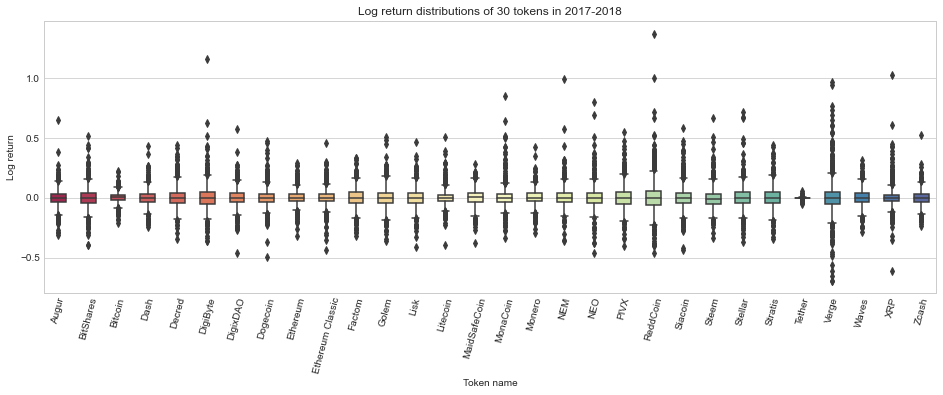

In [8]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,5))
sns.boxplot(data=log_returns, width=0.5, palette='Spectral')
plt.xticks(rotation=75)
plt.xlabel('Token name')
plt.ylabel('Log return')
plt.title('Log return distributions of 30 tokens in 2017-2018')
plt.show()

The box plot shows the distributions of daily log returns of the selected cryptos in 2017 to 2018. All the coins have shown outliers, some of which experienced dispersion in extreme magnitude such as Verge, ReddCoin, Digibyte or MonaCoin. Meanwhile, Tether appears to be the only exception with very low dispersion, as it is a stable coin that has its price pegged 1-to- 1 to the US dollar.

***Correlation between cryptos' log returns***

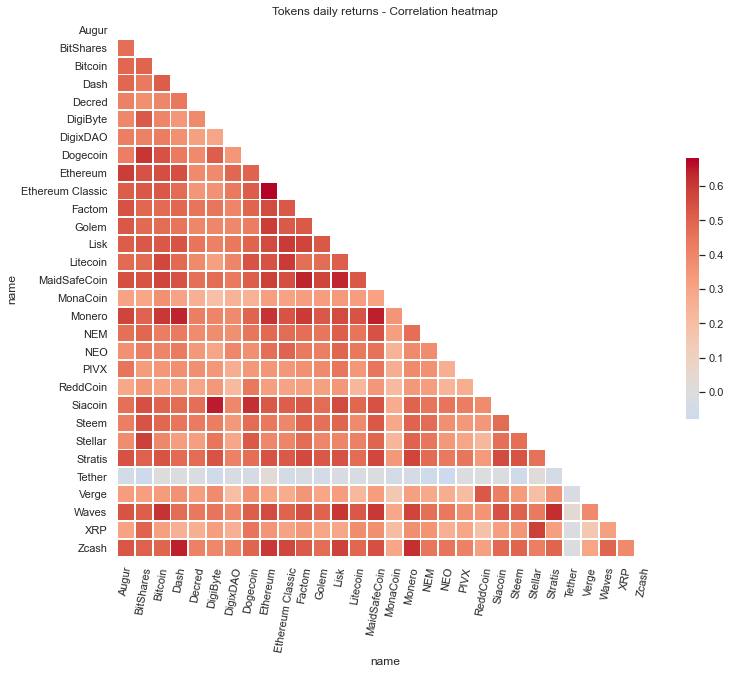

In [9]:
corr = log_returns.corr()

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(12,12))

mask = np.triu(np.ones_like(corr, dtype=bool)) # create a mask for the upper triangle

sns.heatmap(corr, cmap='coolwarm', center=0, mask=mask,
            square=True, linewidths=.8, cbar_kws={"shrink": .4})
plt.xticks(rotation=80)
plt.title('Tokens daily returns - Correlation heatmap')
plt.show()

The correlation heatmap shows that many of these cryptos’ daily returns are linked to each other, with the exception of Tether, since its price is not affected by the market turbulance.

#### Monthly Volatility

In [10]:
# get the month & year index
log_returns['month'] = pd.to_datetime(log_returns['date']).dt.month
log_returns['year'] = pd.to_datetime(log_returns['date']).dt.year
# drop the date column
log_returns.drop('date', axis=1, inplace=True)
log_returns.head(3)

name,Augur,BitShares,Bitcoin,Dash,Decred,DigiByte,DigixDAO,Dogecoin,Ethereum,Ethereum Classic,...,Steem,Stellar,Stratis,Tether,Verge,Waves,XRP,Zcash,month,year
0,0.059,0.015,0.035,0.002,0.032,0.027,0.057,0.022,0.025,-0.007,...,-0.050,0.005,-0.001,0.000,0.147,-0.125,-0.013,0.008,1,2017
1,0.046,0.000,0.023,0.050,-0.037,-0.012,-0.037,-0.009,0.025,0.028,...,-0.045,-0.002,0.026,0.000,-0.047,0.050,-0.009,0.027,1,2017
2,0.019,0.025,0.021,0.079,-0.023,0.110,-0.001,0.004,0.149,0.034,...,0.026,0.031,0.015,0.000,0.000,0.031,0.012,0.005,1,2017


In [11]:
coin_clustering = log_returns.groupby(['year','month'])[log_returns.columns].std().reset_index()
coin_clustering.set_index(['month', 'year'], drop=True, inplace=True)
coin_clustering.head(3)

,name,Augur,BitShares,Bitcoin,Dash,Decred,DigiByte,DigixDAO,Dogecoin,Ethereum,Ethereum Classic,...,ReddCoin,Siacoin,Steem,Stellar,Stratis,Tether,Verge,Waves,XRP,Zcash
month,year,,,,,,,,,,,,,,,,,,,,,
1,2017,0.053,0.043,0.052,0.076,0.155,0.073,0.054,0.027,0.048,0.062,...,0.236,0.078,0.069,0.052,0.096,0.000,0.169,0.049,0.029,0.048
2,2017,0.039,0.029,0.021,0.046,0.096,0.041,0.091,0.023,0.035,0.032,...,0.200,0.033,0.049,0.026,0.049,0.000,0.210,0.058,0.020,0.055
3,2017,0.092,0.071,0.049,0.108,0.166,0.073,0.105,0.052,0.116,0.084,...,0.274,0.099,0.118,0.061,0.099,0.000,0.432,0.079,0.119,0.084


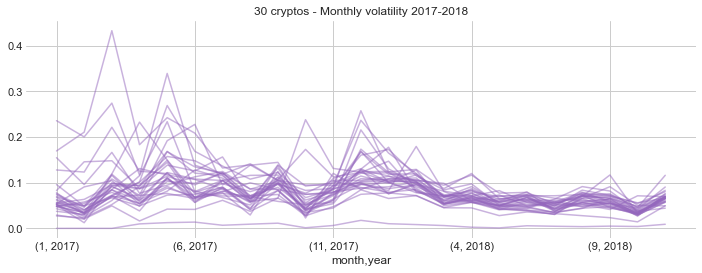

In [12]:
plt.style.use('seaborn-whitegrid')
coin_clustering.plot(figsize=(12,4), legend=False, color='tab:purple', alpha=0.5)
plt.title('30 cryptos - Monthly volatility 2017-2018')
sns.despine(left=True, bottom=True, top=True, right=True)
plt.show()

The chart shows that there were periods of high volatility in 2017, at remarkably different magnitudes between the selected cryptos. However, in 2018, all the cryptos' prices moved much more closely.

***Volatitlity distributions***

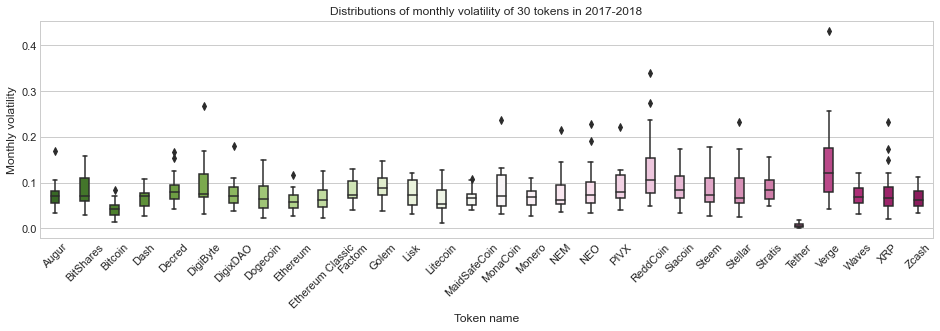

In [13]:
plt.figure(figsize=(16,4))
sns.boxplot(data=coin_clustering, width=0.3, palette='PiYG_r')
plt.xticks(rotation=45)
plt.xlabel('Token name')
plt.ylabel('Monthly volatility')
plt.title('Distributions of monthly volatility of 30 tokens in 2017-2018')
plt.show()

Transpose the dataframe to cluster tokens:

In [14]:
coin_clustering = coin_clustering.T
print(coin_clustering.shape)
coin_clustering.head(3)

(30, 23)


month,1,2,3,4,5,6,7,8,9,10,...,2,3,4,5,6,7,8,9,10,11
year,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
name,,,,,,,,,,,,,,,,,,,,,
Augur,0.053,0.039,0.092,0.063,0.092,0.066,0.105,0.058,0.082,0.033,...,0.078,0.072,0.071,0.083,0.057,0.055,0.070,0.052,0.035,0.070
BitShares,0.043,0.029,0.071,0.101,0.157,0.148,0.118,0.060,0.139,0.093,...,0.103,0.059,0.087,0.057,0.062,0.061,0.065,0.050,0.032,0.065
Bitcoin,0.052,0.021,0.049,0.016,0.042,0.042,0.061,0.037,0.066,0.035,...,0.072,0.045,0.045,0.028,0.036,0.032,0.028,0.023,0.014,0.049


In [15]:
# get column names to plot later
clustering_features = coin_clustering.columns

Scale the features before clustering:

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
coin_clustering_scaled = scaler.fit_transform(coin_clustering)

### K-Means

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
sillhoute_kmeans = []
inertia_kmeans = []
n_clusters = np.arange(2,21).astype(int)

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    clusters = kmeans.fit_predict(coin_clustering_scaled)
    inertia_kmeans.append(kmeans.inertia_)
    sillhoute_kmeans.append(silhouette_score(coin_clustering_scaled, kmeans.labels_))

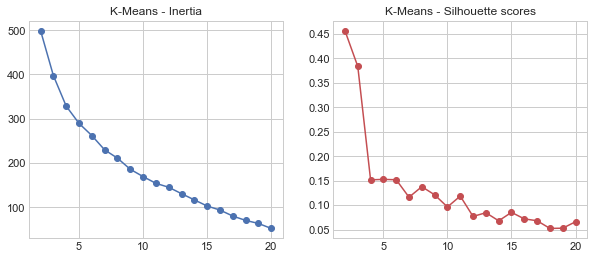

In [19]:
plt.style.use('seaborn-whitegrid')
fig,ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(n_clusters, inertia_kmeans, color='b', marker='o')
ax[0].set_title('K-Means - Inertia')

ax[1].plot(n_clusters, sillhoute_kmeans, color='r', marker='o')
ax[1].set_title('K-Means - Silhouette scores')

plt.show()

We'll choose number of clusters as 3, where the inertia is reduced but the silhouette score does not drop to low.

In [20]:
kmeans = KMeans(n_clusters=3, random_state=1)
coin_clustering['cluster_kmeans_3'] = kmeans.fit_predict(coin_clustering_scaled)

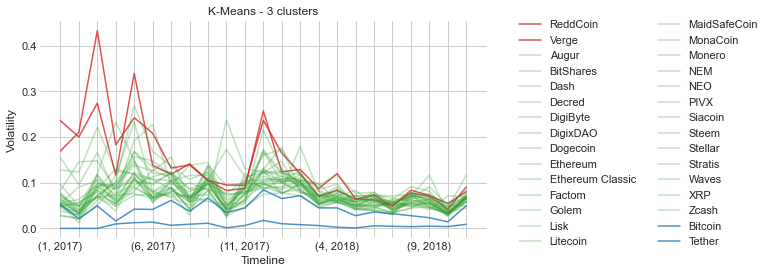

In [21]:
plt.style.use('seaborn-whitegrid')
fig, ax= plt.subplots(1,1, figsize=(8,4))
color_list = ['tab:red', 'tab:green', 'tab:blue']
cluster_labels = sorted(coin_clustering['cluster_kmeans_3'].unique())

for label, color in zip(cluster_labels, color_list):
    if label==1:
        coin_clustering[coin_clustering['cluster_kmeans_3']==label][clustering_features].T.plot(
            ax=ax, legend=False, alpha=0.3, color=color)
    else:
        coin_clustering[coin_clustering['cluster_kmeans_3']==label][clustering_features].T.plot(
            ax=ax, legend=False, alpha=0.8, color=color)

ax.set_xticks(np.arange(0,23))
ax.set_ylabel('Volatility')
ax.set_xlabel('Timeline')

plt.legend(ncol=2, bbox_to_anchor=(1.05,1.05))
sns.despine(left=True, bottom=True, top=True, right=True)
plt.title('K-Means - 3 clusters')
plt.show()

Plotting the cluster labels, we can see that the 2 highly volatile coins are grouped together, and a large number of coins are homogenous according to K-Means algorithm. Notably, Bitcoin is grouped with the stable coin Tether, while they are fundamentally different, and they also have consistently different price behaviors.
In short, K-Means with Euclidean distance and 3 clusters give mixed results and somewhat misleading signal.

### K-Means with Dynamic Time Warping
In this section, we'll keep K-Means algorithm and Euclidean distance, but combine Dynamic Time Warping method to align the series before calculating the pairwise distances.

In [22]:
# pip install tslearn

In [23]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score

/Applications/anaconda3/lib/python3.7/site-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


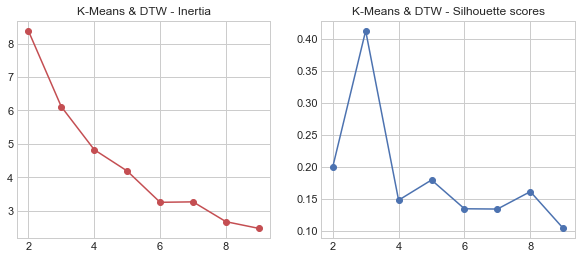

In [24]:
coin_clustering_dtw = np.array(coin_clustering_scaled)

inertia_dtw = []
silhouette_dtw = []
n_clusters_dtw = np.arange(2,10,1)

for n in n_clusters_dtw:
    km_dtw = TimeSeriesKMeans(n_clusters=n,
                          n_init=2,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=42)
    labels = km_dtw.fit_predict(coin_clustering_dtw)
    inertia_dtw.append(km_dtw.inertia_)
    silhouette_dtw.append(silhouette_score(coin_clustering_dtw, labels=labels))

fig,ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(n_clusters_dtw, inertia_dtw, linestyle='-', marker='o', color='r')
ax[0].set_title('K-Means & DTW - Inertia')

ax[1].plot(n_clusters_dtw, silhouette_dtw, linestyle='-', marker='o', color='b')
ax[1].set_title('K-Means & DTW - Silhouette scores')
plt.show()

At 3 clusters, the silhouette score is at the highest, while inertia is reduced. We'll choose this to visualize the clusters and inspect the results:

In [25]:
# 3 clusters
km_dtw_3 = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=2)
coin_clustering['cluster_km_dtw_3'] = km_dtw_3.fit_predict(coin_clustering_dtw)

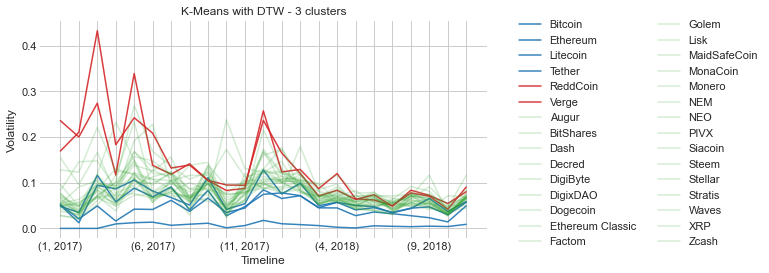

In [26]:
# plt.style.use('seaborn-whitegrid')
fig, ax= plt.subplots(1,1, figsize=(8,4))
color_dtw = ['tab:blue', 'tab:red', 'tab:green']
dtw_labels = sorted(coin_clustering['cluster_km_dtw_3'].unique())

for label, color in zip(dtw_labels, color_dtw):
    filt = (coin_clustering['cluster_km_dtw_3'] == label)
    if label == 2:
        coin_clustering[filt][clustering_features].T.plot(
            ax=ax, legend=False, alpha=0.2, color=color)
    else: 
        coin_clustering[filt][clustering_features].T.plot(
            ax=ax, legend=False, alpha=0.9, color=color)
        
ax.set_xticks(np.arange(0,23))
ax.set_ylabel('Volatility')
ax.set_xlabel('Timeline')
sns.despine(left=True, bottom=True, top=True, right=True)
plt.legend(ncol=2, bbox_to_anchor=(1.05,1.05))
plt.title('K-Means with DTW - 3 clusters')
plt.show()

When combined with DTW, K-Means detects not only Bitcoin, but also Ethereum and Litecoin, which are amongst the largest cryptos and have notable volatilities, in the same group with the stable coin. There are no other significant characteristics found, but probably more noises.

### Hiarchical Clustering with DTW

- Using DTW to calculate pairwise distances between crypto series - return a squared distance matrix: https://tslearn.readthedocs.io/en/latest/gen_modules/metrics/tslearn.metrics.cdist_dtw.html#tslearn.metrics.cdist_dtw
- To plot the dendogram to define the number of clusters:
    - Turn the squared distance matrix to a condensed distance matrix, which is "a flat array containing the upper triangular of the distance matrix." https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html#scipy.spatial.distance.squareform
    - Encode into linkage form: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
    
- After the number of clusters is defined, run Agglomerative Clustering using the "precomputed" squared distance matrix by DTW.

In [27]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import squareform

In [28]:
from tslearn.metrics import cdist_dtw

In [29]:
# apply the ward clustering
dtw_dist_matrix = cdist_dtw(np.array(coin_clustering_scaled))
# convert to a condensed distance matrix
dtw_condensed_matrix = squareform(dtw_dist_matrix)
# encode to linkage form to plot the dendogram
z_matrix = linkage(dtw_condensed_matrix)

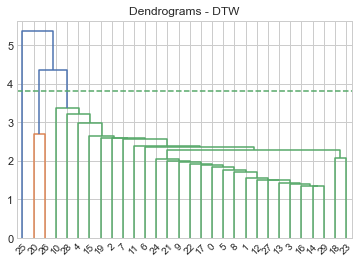

In [30]:
# plot the dendrogram
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6,4))
dendrogram(z_matrix)
plt.axhline(y=3.8, color='g', linestyle='--')
plt.title('Dendrograms - DTW', fontsize=12)
plt.show()

It appears that there are 3 coins detected in 2 outlier clusters, while the rest are homogenous. If we slice the dendrogram to get 3 clusters, as the horizontal line indicates, then the clusters’ sizes are highly imbalanced.

In [31]:
agglo = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='single')
agglo.fit(dtw_dist_matrix)

AgglomerativeClustering(affinity='precomputed', linkage='single', n_clusters=3)

In [32]:
coin_clustering['agglo_cluster_dtw'] = agglo.labels_

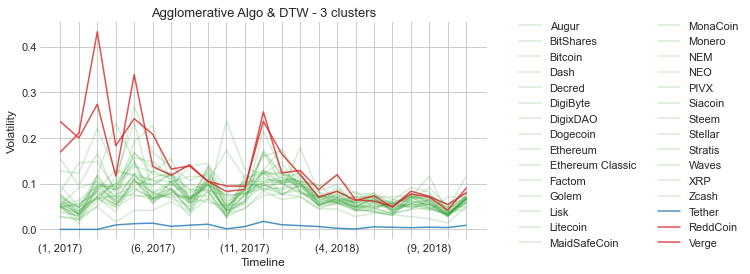

In [33]:
# plt.style.use('seaborn-whitegrid')
fig, ax= plt.subplots(1,1, figsize=(8,4))
color_agglo_dtw = ['tab:green', 'tab:blue', 'tab:red']
labels_agglo_dtw = sorted(coin_clustering['agglo_cluster_dtw'].unique())

for label, color in zip(labels_agglo_dtw, color_agglo_dtw):
    filt = (coin_clustering['agglo_cluster_dtw'] == label)
    if label == 0:
        coin_clustering[filt][clustering_features].T.plot(
            ax=ax, legend=False, alpha=0.2, color=color)

    else:
        coin_clustering[filt][clustering_features].T.plot(
            ax=ax, legend=False, alpha=0.8, color=color)

ax.set_xticks(np.arange(0,23))
ax.set_ylabel('Volatility')
ax.set_xlabel('Timeline')
ax.legend(ncol=2, bbox_to_anchor=(1.05,1.05))
sns.despine(left=True, bottom=True, top=True, right=True)
plt.title('Agglomerative Algo & DTW - 3 clusters', fontsize=13)
plt.show()

Inspecting the members of each cluster, we can see that now Tether is detected as an “outlier” in its own group, along with the two most volatile cryptos in another “outlier” group. The rest of the cryptos are significantly correlated in terms of monthly volatility and do not show distinguishable characteristics.

Interestingly, in 2017 and the 1st quarter of 2018, many cryptocurrencies' prices varied strongly and at different magnitudes. However, towars the end of 2018, most of cryptos consolidated their prices and started to move much more closely.

## Visualization

### PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2)
coin_clustering_pca = pca.fit_transform(coin_clustering[clustering_features])
print('% of variance preserved after transformation:\n{}'.\
      format(np.cumsum(pca.explained_variance_ratio_)))

% of variance preserved after transformation:
[0.55270155 0.69500755]


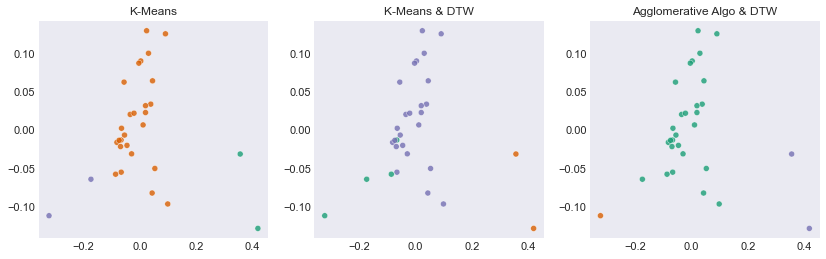

In [36]:
plt.style.use('seaborn-dark')
fig,ax = plt.subplots(1,3,figsize=(14,4))

label_cols = ['cluster_kmeans_3', 'cluster_km_dtw_3','agglo_cluster_dtw']
titles = ['K-Means', 'K-Means & DTW', 'Agglomerative Algo & DTW']
for i, col, title in zip([0,1,2], label_cols, titles):
    sns.scatterplot(x=coin_clustering_pca[:,0], y=coin_clustering_pca[:,1],
                ax=ax[i], legend=False, alpha=0.8,
                hue=coin_clustering[col], palette='Dark2')
    ax[i].set_title(title, fontsize=12)
plt.show()

### Isomap

In [37]:
from sklearn.manifold import Isomap

In [38]:
iso = Isomap(n_neighbors=5, n_components=2)
iso.fit(coin_clustering[clustering_features])
cluster_iso_2D = iso.transform(coin_clustering[clustering_features])
cluster_iso_df = pd.DataFrame(cluster_iso_2D, columns=['Component 1', 'Component 2'])

In [39]:
cluster_iso_with_labels = pd.concat([coin_clustering[label_cols].reset_index(), cluster_iso_df], axis=1)

cluster_iso_with_labels.columns = ['name', 'cluster_kmeans_3', 'cluster_km_dtw_3', 'agglo_cluster_dtw',
                                  'Component_1', 'Component_2']

In [40]:
cluster_iso_with_labels.head(3)

,name,cluster_kmeans_3,cluster_km_dtw_3,agglo_cluster_dtw,Component_1,Component_2
0,Augur,1,2,0,-0.123,0.027
1,BitShares,1,2,0,0.037,-0.122
2,Bitcoin,2,0,0,-0.159,0.153


Isomap 2D with 5 neighbors


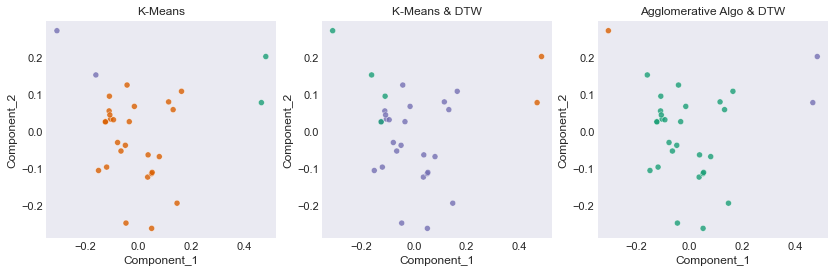

In [41]:
print('Isomap 2D with 5 neighbors')
fig,ax = plt.subplots(1,3, figsize=(14,4))

for i, col, title in zip([0,1,2], label_cols, titles):
    sns.scatterplot(x=cluster_iso_with_labels['Component_1'], y=cluster_iso_with_labels['Component_2'],
                ax=ax[i], legend=False, alpha=0.8,
                hue= cluster_iso_with_labels[col],
                palette='Dark2')
    ax[i].set_title(title, fontsize=12)
plt.show()

### t-SNE

In [42]:
from sklearn.manifold import TSNE

t-SNE with perplexity = 3 & learning rate = 20


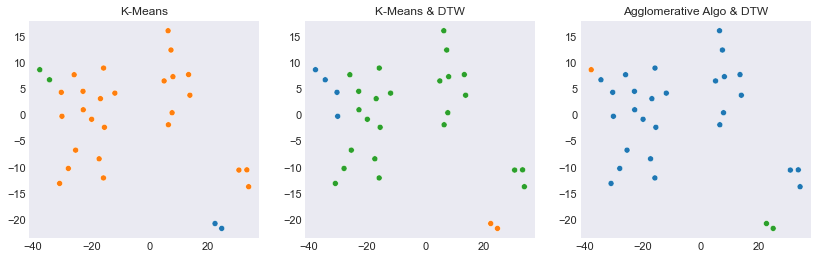

In [43]:
perplx = 3
lr = 20
print(f't-SNE with perplexity = {perplx} & learning rate = {lr}')
tsne = TSNE(perplexity=perplx, learning_rate=lr, init='pca', random_state=42)
coins_clustering_tsne = tsne.fit_transform(coin_clustering[clustering_features])

fig,ax = plt.subplots(1,3,figsize=(14,4))

for i, col, title in zip([0,1,2], label_cols, titles):
    sns.scatterplot(x=coins_clustering_tsne[:,0], y=coins_clustering_tsne[:,1],
                ax=ax[i], legend=False,
                hue=coin_clustering[col], palette='tab10')
    ax[i].set_title(title, fontsize=12)
    
plt.show()

The visualizations using Isomap and t-SNE are more flexible than PCA, but also inconsistent by each iteration and/or with different sets of parameters. Especially with t-SNE, the clusters’ distances & densities are not consistently preserved.